In [212]:
#to add package, go to REPL
#using Pkg
#Pkg.add("Package Name")
using DataFrames
using RDatasets
using Statistics
using StatsPlots
using CSV
using StatsBase
using NamedArrays
using PrettyTables

using LIBSVM
using Printf
# using SVR
using MLJ
using Mads
using Metrics
using ScikitLearn.GridSearch: GridSearchCV
using ScikitLearn
using Plots.Measures
include(joinpath(dirname(pwd()), "plottraintest.jl"))
using PyCall


# fsize = 7
# ftsize = 7

In [179]:
skSVR = pyimport("sklearn.svm")
StandardScaler = pyimport("sklearn.preprocessing")

PyObject <module 'sklearn.preprocessing' from 'C:\\Users\\ASUS\\.julia\\conda\\3\\lib\\site-packages\\sklearn\\preprocessing\\__init__.py'>

In [180]:
df = CSV.read(joinpath(dirname(pwd()), "Concrete_Data.csv"), DataFrame)

,Cement (kg/m3),Blast Furnace Slag (kg/m3),Fly Ash (kg/m3),Water (kg/m3),Superplasticizer (kg/m3)
,Float64,Float64,Float64,Float64,Float64
1,540.0,0.0,0.0,162.0,2.5
2,540.0,0.0,0.0,162.0,2.5
3,332.5,142.5,0.0,228.0,0.0
4,332.5,142.5,0.0,228.0,0.0
5,198.6,132.4,0.0,192.0,0.0
6,266.0,114.0,0.0,228.0,0.0
7,380.0,95.0,0.0,228.0,0.0
8,380.0,95.0,0.0,228.0,0.0
9,266.0,114.0,0.0,228.0,0.0


In [84]:
#splitting into 60% training, 30% test, 10% validation

dfm = Matrix(df)
dfms = dfm[shuffle(1:end), :]
dfms = dfm

x = dfms[:, 1:8]
y = dfms[:, 9]

data_split = [0.6, 0.3, 0.1]
split_cs2 = Int.(round.(cumsum(data_split)*length(y)))
split_cs1 = vcat(1, split_cs2[1:(end-1)].+1)

xtrain = x[split_cs1[1]:split_cs2[1], :]
ytrain = y[split_cs1[1]:split_cs2[1]]

xtest = x[split_cs1[2]:split_cs2[2], :]
ytest = y[split_cs1[2]:split_cs2[2]]

xval = x[split_cs1[3]:split_cs2[3], :]
yval = y[split_cs1[3]:split_cs2[3]];

In [5]:
#training the model, setting the hypermeters C, degree, gamma. Want to use gridsearch to optimise hyperparameters. Not sure what SVR.train does #how to do gradient descent for hyperparameters

# pmodel = SVR.train(ytrain, permutedims(xtrain),; kernel_type=SVR.RBF, C= 10.0, degree = 1 , gamma = 0.00003)

# y_pr = SVR.predict(pmodel, permutedims(xtest))
# mse_SVR = mse(y_pr, ytest)

In [6]:
# param_grid = Dict(:C =10:100,
#                 :gamma => :9.0e-7:3.0e-7:2.0e-5,
#                 :degree => 0.1:0.5:2)

# grid = GridSearchCV(skSVR.SVR(), param_grid, refit = true, verbose = 2)
# ScikitLearn.fit!(grid ,xtrain, ytrain)> 1:

In [7]:
# println("Best hyper-parameters: $(grid.best_params_)")

In [218]:
regressor = ScikitLearn.fit!(skSVR.SVR(C=10, gamma=1.1e-5, degree =1.0),xtrain,ytrain)
# regressor = ScikitLearn.fit!(skSVR.SVR(),xtrain,ytrain)

y_pr_train = ScikitLearn.predict(regressor,xtrain)
y_pr_test = ScikitLearn.predict(regressor,xtest)
y_pr_val = ScikitLearn.predict(regressor, xval)
println("rmse_train = $(rmse_SVR_train = sqrt(mse(y_pr_train, ytrain)))")
println("rmse_test = $(rmse_SVR_test = sqrt(mse(y_pr_test, ytest)))")
println("rmse_val = $(rmse_SVR_test = sqrt(mse(y_pr_val, yval)))")


#C=50, gamma=2.0e-6, degree =1.0
#C=100, gamma=1.1e-5, degree =0.0
#C=10, gamma=1.1e-5, degree =1.0

rmse_train = 8.457503661392247
rmse_test = 8.465709185121376
rmse_val = 8.86727244375384


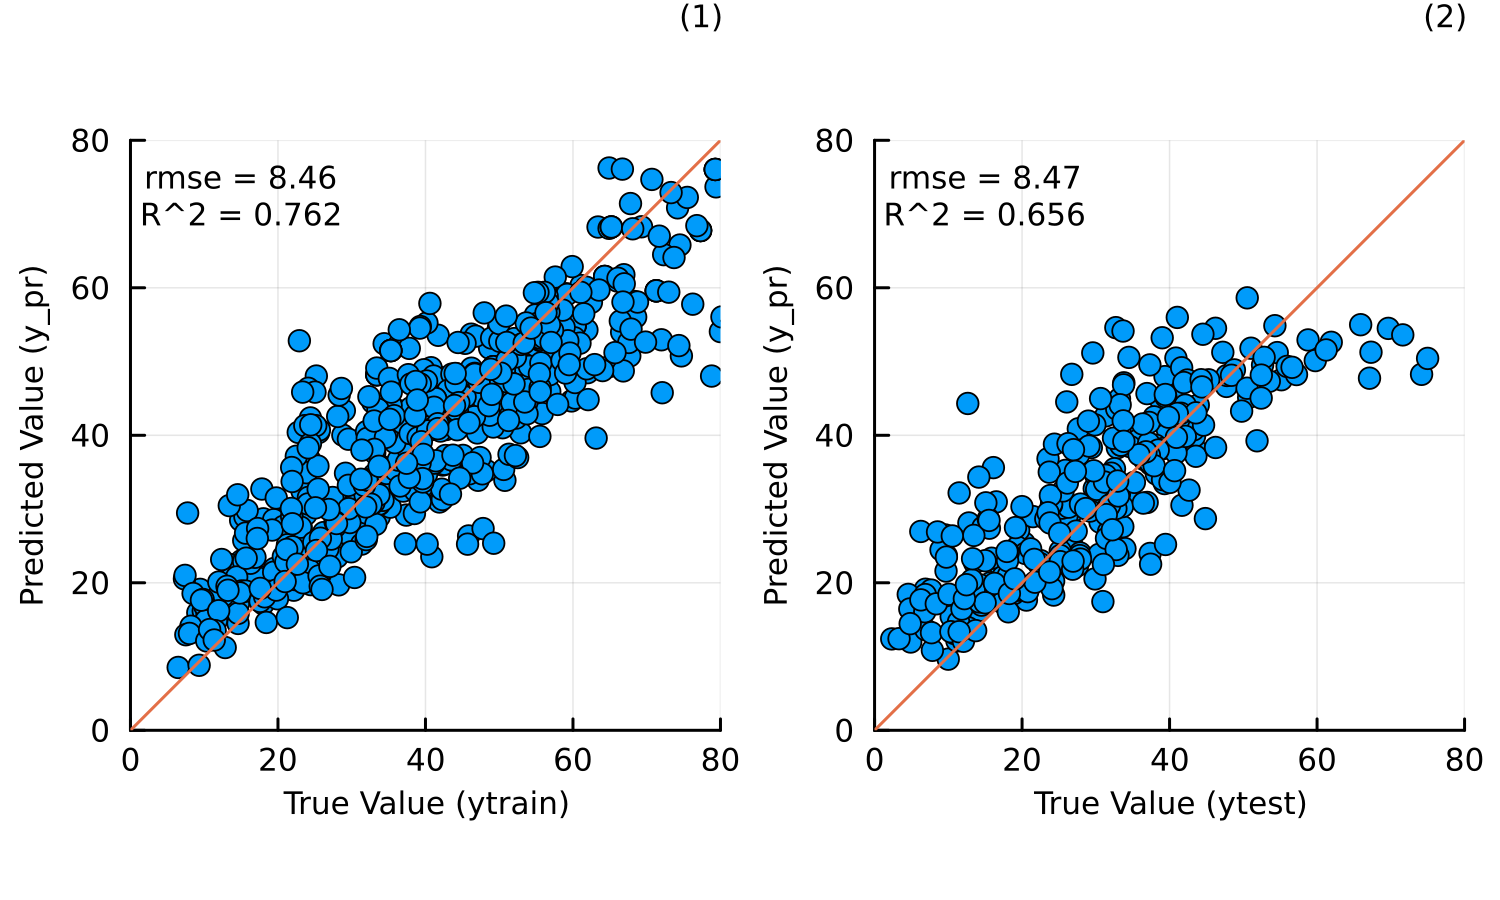

In [219]:
display(plottraintest(ytrain, y_pr_train, ytest, y_pr_test))#,"After Hyperparameter Tuning (Train)", "After Hyperparameter Tuning (Test)"))
savefig(joinpath(dirname(@__FILE__), "SVR_2.png"))

# display(plottraintest(ytrain, y_pr_train, ytest, y_pr_test))#,"Before Hyperparameter Tuning (Train)", "Before Hyperparameter Tuning (Test)"))
# savefig(joinpath(dirname(@__FILE__), "SVR_initial_2.png"))

In [10]:
xmean = mean(xtrain, dims=1)
#ymean = mean(y, dims=1)
xstd = std(xtrain, dims=1)
#ystd = std(y, dims=1)

ytrain =  ytrain #(ytrain.-ymean)./ystd
xtrainnorm = (xtrain.-xmean)./xstd

ytest = ytest #(ytest.-ymean)./ystd
xtestnorm = (xtest.-xmean)./xstd

xvalnorm = (xval.-xmean)./xstd

103×8 Matrix{Float64}:
 -1.38048     1.81118    1.4192    …  -2.21208   -0.910763    -0.323521
 -1.45994     1.06894    2.0807       -0.621088  -1.88268     -0.323521
 -1.599       0.48488    2.06495      -0.209626  -1.6427      -0.323521
 -1.36062     1.75034    1.56095      -1.81433   -1.33073     -0.323521
 -1.50961    -0.610233   2.09645       0.558437  -0.850768    -0.323521
 -1.41028     1.32447    1.93895   …  -1.85547   -2.01467     -0.323521
 -1.28116     1.48265    2.09645      -1.12856   -1.7267      -0.323521
 -1.1123      0.253689   2.0177       -0.785673  -1.88268     -0.323521
 -1.39042     1.37314    1.97045      -1.73204   -1.99067     -0.323521
 -0.586864    0.323046   0.151332     -1.74712   -1.01395     -0.323521
  ⋮                                ⋱   ⋮                      
  0.0220077  -0.792751   0.710454     -1.38092   -0.428403    -0.323521
 -0.312723    0.557887   0.387581  …  -2.02555    0.125951    -0.323521
 -1.35267     2.24923   -0.974788      0.946583  -

In [49]:
param_grid_norm = Dict(:C => 10:10:100,
                :gamma => 0.01:0.01:0.1)
                #:degree => 0:0.2:2)

grid_norm = GridSearchCV(skSVR.SVR(), param_grid_norm, refit = true, verbose = 2)
ScikitLearn.fit!(grid_norm ,xtrainnorm, ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] gamma=0.01, C=10


[CV] gamma=0.01, C=10  -  0.0s
[CV] gamma=0.01, C=10
[CV] gamma=0.01, C=10  -  0.0s
[CV] gamma=0.01, C=10
[CV] gamma=0.01, C=10  -  0.0s
[CV] gamma=0.02, C=10
[CV] gamma=0.02, C=10  -  0.0s
[CV] gamma=0.02, C=10
[CV] gamma=0.02, C=10  -  0.0s
[CV] gamma=0.02, C=10


[CV] gamma=0.02, C=10  -  0.0s
[CV] gamma=0.03, C=10
[CV] gamma=0.03, C=10  -  0.0s
[CV] gamma=0.03, C=10
[CV] gamma=0.03, C=10  -  0.0s
[CV] gamma=0.03, C=10
[CV] gamma=0.03, C=10  -  0.0s
[CV] gamma=0.04, C=10
[CV] gamma=0.04, C=10  -  0.0s
[CV] gamma=0.04, C=10


[CV] gamma=0.04, C=10  -  0.0s
[CV] gamma=0.04, C=10
[CV] gamma=0.04, C=10  -  0.0s
[CV] gamma=0.05, C=10
[CV] gamma=0.05, C=10  -  0.0s
[CV] gamma=0.05, C=10
[CV] gamma=0.05, C=10  -  0.0s
[CV] gamma=0.05, C=10
[CV] gamma=0.05, C=10  -  0.0s
[CV] gamma=0.06, C=10


[CV] gamma=0.06, C=10  -  0.0s
[CV] gamma=0.06, C=10
[CV] gamma=0.06, C=10  -  0.0s
[CV] gamma=0.06, C=10
[CV] gamma=0.06, C=10  -  0.0s
[CV] gamma=0.07, C=10


[CV] gamma=0.07, C=10  -  0.0s
[CV] gamma=0.07, C=10
[CV] gamma=0.07, C=10  -  0.0s
[CV] gamma=0.07, C=10
[CV] gamma=0.07, C=10  -  0.0s
[CV] gamma=0.08, C=10
[CV] gamma=0.08, C=10  -  0.0s
[CV] gamma=0.08, C=10
[CV] gamma=0.08, C=10  -  0.0s
[CV] gamma=0.08, C=10


[CV] gamma=0.08, C=10  -  0.0s
[CV] gamma=0.09, C=10
[CV] gamma=0.09, C=10  -  0.0s
[CV] gamma=0.09, C=10
[CV] gamma=0.09, C=10  -  0.0s
[CV] gamma=0.09, C=10
[CV] gamma=0.09, C=10  -  0.0s
[CV] gamma=0.1, C=10


[CV] gamma=0.1, C=10  -  0.0s
[CV] gamma=0.1, C=10
[CV] gamma=0.1, C=10  -  0.0s
[CV] gamma=0.1, C=10
[CV] gamma=0.1, C=10  -  0.0s
[CV] gamma=0.01, C=20
[CV] gamma=0.01, C=20  -  0.0s
[CV] gamma=0.01, C=20
[CV] gamma=0.01, C=20  -  0.0s
[CV] gamma=0.01, C=20


[CV] gamma=0.01, C=20  -  0.0s
[CV] gamma=0.02, C=20
[CV] gamma=0.02, C=20  -  0.0s
[CV] gamma=0.02, C=20
[CV] gamma=0.02, C=20  -  0.0s
[CV] gamma=0.02, C=20
[CV] gamma=0.02, C=20  -  0.0s
[CV] gamma=0.03, C=20
[CV] gamma=0.03, C=20  -  0.0s
[CV] gamma=0.03, C=20


[CV] gamma=0.03, C=20  -  0.0s
[CV] gamma=0.03, C=20
[CV] gamma=0.03, C=20  -  0.0s
[CV] gamma=0.04, C=20
[CV] gamma=0.04, C=20  -  0.0s
[CV] gamma=0.04, C=20
[CV] gamma=0.04, C=20  -  0.0s
[CV] gamma=0.04, C=20
[CV] gamma=0.04, C=20  -  0.0s
[CV] gamma=0.05, C=20


[CV] gamma=0.05, C=20  -  0.0s
[CV] gamma=0.05, C=20
[CV] gamma=0.05, C=20  -  0.0s
[CV] gamma=0.05, C=20
[CV] gamma=0.05, C=20  -  0.0s
[CV] gamma=0.06, C=20
[CV] gamma=0.06, C=20  -  0.0s
[CV] gamma=0.06, C=20


[CV] gamma=0.06, C=20  -  0.0s
[CV] gamma=0.06, C=20
[CV] gamma=0.06, C=20  -  0.0s
[CV] gamma=0.07, C=20
[CV] gamma=0.07, C=20  -  0.0s
[CV] gamma=0.07, C=20
[CV] gamma=0.07, C=20  -  0.0s
[CV] gamma=0.07, C=20
[CV] gamma=0.07, C=20  -  0.0s
[CV] gamma=0.08, C=20


[CV] gamma=0.08, C=20  -  0.0s
[CV] gamma=0.08, C=20
[CV] gamma=0.08, C=20  -  0.0s
[CV] gamma=0.08, C=20
[CV] gamma=0.08, C=20  -  0.0s
[CV] gamma=0.09, C=20
[CV] gamma=0.09, C=20  -  0.0s
[CV] gamma=0.09, C=20
[CV] gamma=0.09, C=20  -  0.0s
[CV] gamma=0.09, C=20


[CV] gamma=0.09, C=20  -  0.0s
[CV] gamma=0.1, C=20
[CV] gamma=0.1, C=20  -  0.0s
[CV] gamma=0.1, C=20
[CV] gamma=0.1, C=20  -  0.0s
[CV] gamma=0.1, C=20
[CV] gamma=0.1, C=20  -  0.0s
[CV] gamma=0.01, C=30
[CV] gamma=0.01, C=30  -  0.0s
[CV] gamma=0.01, C=30


[CV] gamma=0.01, C=30  -  0.0s
[CV] gamma=0.01, C=30
[CV] gamma=0.01, C=30  -  0.0s
[CV] gamma=0.02, C=30
[CV] gamma=0.02, C=30  -  0.0s
[CV] gamma=0.02, C=30
[CV] gamma=0.02, C=30  -  0.0s
[CV] gamma=0.02, C=30
[CV] gamma=0.02, C=30  -  0.0s
[CV] gamma=0.03, C=30


[CV] gamma=0.03, C=30  -  0.0s
[CV] gamma=0.03, C=30
[CV] gamma=0.03, C=30  -  0.0s
[CV] gamma=0.03, C=30
[CV] gamma=0.03, C=30  -  0.0s
[CV] gamma=0.04, C=30
[CV] gamma=0.04, C=30  -  0.0s
[CV] gamma=0.04, C=30
[CV] gamma=0.04, C=30  -  0.0s
[CV] gamma=0.04, C=30


[CV] gamma=0.04, C=30  -  0.0s
[CV] gamma=0.05, C=30
[CV] gamma=0.05, C=30  -  0.0s
[CV] gamma=0.05, C=30
[CV] gamma=0.05, C=30  -  0.0s
[CV] gamma=0.05, C=30
[CV] gamma=0.05, C=30  -  0.0s
[CV] gamma=0.06, C=30


[CV] gamma=0.06, C=30  -  0.0s
[CV] gamma=0.06, C=30
[CV] gamma=0.06, C=30  -  0.0s
[CV] gamma=0.06, C=30
[CV] gamma=0.06, C=30  -  0.0s
[CV] gamma=0.07, C=30
[CV] gamma=0.07, C=30  -  0.0s
[CV] gamma=0.07, C=30


[CV] gamma=0.07, C=30  -  0.0s
[CV] gamma=0.07, C=30
[CV] gamma=0.07, C=30  -  0.0s
[CV] gamma=0.08, C=30
[CV] gamma=0.08, C=30  -  0.0s
[CV] gamma=0.08, C=30
[CV] gamma=0.08, C=30  -  0.0s
[CV] gamma=0.08, C=30


[CV] gamma=0.08, C=30  -  0.0s
[CV] gamma=0.09, C=30
[CV] gamma=0.09, C=30  -  0.0s
[CV] gamma=0.09, C=30
[CV] gamma=0.09, C=30  -  0.0s
[CV] gamma=0.09, C=30
[CV] gamma=0.09, C=30  -  0.0s
[CV] gamma=0.1, C=30
[CV] gamma=0.1, C=30  -  0.0s
[CV] gamma=0.1, C=30


[CV] gamma=0.1, C=30  -  0.0s
[CV] gamma=0.1, C=30
[CV] gamma=0.1, C=30  -  0.0s
[CV] gamma=0.01, C=40
[CV] gamma=0.01, C=40  -  0.0s
[CV] gamma=0.01, C=40
[CV] gamma=0.01, C=40  -  0.0s
[CV] gamma=0.01, C=40
[CV] gamma=0.01, C=40  -  0.0s
[CV] gamma=0.02, C=40


[CV] gamma=0.02, C=40  -  0.0s
[CV] gamma=0.02, C=40
[CV] gamma=0.02, C=40  -  0.0s
[CV] gamma=0.02, C=40
[CV] gamma=0.02, C=40  -  0.0s
[CV] gamma=0.03, C=40
[CV] gamma=0.03, C=40  -  0.0s
[CV] gamma=0.03, C=40


[CV] gamma=0.03, C=40  -  0.0s
[CV] gamma=0.03, C=40
[CV] gamma=0.03, C=40  -  0.0s
[CV] gamma=0.04, C=40
[CV] gamma=0.04, C=40  -  0.0s
[CV] gamma=0.04, C=40
[CV] gamma=0.04, C=40  -  0.0s
[CV] gamma=0.04, C=40


[CV] gamma=0.04, C=40  -  0.0s
[CV] gamma=0.05, C=40
[CV] gamma=0.05, C=40  -  0.0s
[CV] gamma=0.05, C=40
[CV] gamma=0.05, C=40  -  0.0s
[CV] gamma=0.05, C=40
[CV] gamma=0.05, C=40  -  0.0s
[CV] gamma=0.06, C=40
[CV] gamma=0.06, C=40  -  0.0s
[CV] gamma=0.06, C=40


[CV] gamma=0.06, C=40  -  0.0s
[CV] gamma=0.06, C=40
[CV] gamma=0.06, C=40  -  0.0s
[CV] gamma=0.07, C=40
[CV] gamma=0.07, C=40  -  0.0s
[CV] gamma=0.07, C=40
[CV] gamma=0.07, C=40  -  0.0s
[CV] gamma=0.07, C=40
[CV] gamma=0.07, C=40  -  0.0s


[CV] gamma=0.08, C=40
[CV] gamma=0.08, C=40  -  0.0s
[CV] gamma=0.08, C=40
[CV] gamma=0.08, C=40  -  0.0s
[CV] gamma=0.08, C=40
[CV] gamma=0.08, C=40  -  0.0s
[CV] gamma=0.09, C=40


[CV] gamma=0.09, C=40  -  0.0s
[CV] gamma=0.09, C=40
[CV] gamma=0.09, C=40  -  0.0s
[CV] gamma=0.09, C=40
[CV] gamma=0.09, C=40  -  0.0s
[CV] gamma=0.1, C=40
[CV] gamma=0.1, C=40  -  0.0s
[CV] gamma=0.1, C=40


[CV] gamma=0.1, C=40  -  0.0s
[CV] gamma=0.1, C=40
[CV] gamma=0.1, C=40  -  0.0s
[CV] gamma=0.01, C=50
[CV] gamma=0.01, C=50  -  0.0s
[CV] gamma=0.01, C=50
[CV] gamma=0.01, C=50  -  0.0s
[CV] gamma=0.01, C=50
[CV] gamma=0.01, C=50  -  0.0s
[CV] gamma=0.02, C=50


[CV] gamma=0.02, C=50  -  0.0s
[CV] gamma=0.02, C=50
[CV] gamma=0.02, C=50  -  0.0s
[CV] gamma=0.02, C=50
[CV] gamma=0.02, C=50  -  0.0s
[CV] gamma=0.03, C=50
[CV] gamma=0.03, C=50  -  0.0s
[CV] gamma=0.03, C=50
[CV] gamma=0.03, C=50  -  0.0s
[CV] gamma=0.03, C=50


[CV] gamma=0.03, C=50  -  0.0s
[CV] gamma=0.04, C=50
[CV] gamma=0.04, C=50  -  0.0s
[CV] gamma=0.04, C=50
[CV] gamma=0.04, C=50  -  0.0s
[CV] gamma=0.04, C=50
[CV] gamma=0.04, C=50  -  0.0s
[CV] gamma=0.05, C=50


[CV] gamma=0.05, C=50  -  0.0s
[CV] gamma=0.05, C=50
[CV] gamma=0.05, C=50  -  0.0s
[CV] gamma=0.05, C=50
[CV] gamma=0.05, C=50  -  0.0s
[CV] gamma=0.06, C=50
[CV] gamma=0.06, C=50  -  0.0s
[CV] gamma=0.06, C=50
[CV] gamma=0.06, C=50  -  0.0s
[CV] gamma=0.06, C=50


[CV] gamma=0.06, C=50  -  0.0s
[CV] gamma=0.07, C=50
[CV] gamma=0.07, C=50  -  0.0s
[CV] gamma=0.07, C=50
[CV] gamma=0.07, C=50  -  0.0s
[CV] gamma=0.07, C=50
[CV] gamma=0.07, C=50  -  0.0s
[CV] gamma=0.08, C=50
[CV] gamma=0.08, C=50  -  0.0s
[CV] gamma=0.08, C=50


[CV] gamma=0.08, C=50  -  0.0s
[CV] gamma=0.08, C=50
[CV] gamma=0.08, C=50  -  0.0s
[CV] gamma=0.09, C=50
[CV] gamma=0.09, C=50  -  0.0s
[CV] gamma=0.09, C=50
[CV] gamma=0.09, C=50  -  0.0s
[CV] gamma=0.09, C=50


[CV] gamma=0.09, C=50  -  0.0s
[CV] gamma=0.1, C=50
[CV] gamma=0.1, C=50  -  0.0s
[CV] gamma=0.1, C=50
[CV] gamma=0.1, C=50  -  0.0s
[CV] gamma=0.1, C=50
[CV] gamma=0.1, C=50  -  0.0s
[CV] gamma=0.01, C=60


[CV] gamma=0.01, C=60  -  0.0s
[CV] gamma=0.01, C=60
[CV] gamma=0.01, C=60  -  0.0s
[CV] gamma=0.01, C=60
[CV] gamma=0.01, C=60  -  0.0s
[CV] gamma=0.02, C=60
[CV] gamma=0.02, C=60  -  0.0s
[CV] gamma=0.02, C=60
[CV] gamma=0.02, C=60  -  0.0s
[CV] gamma=0.02, C=60


[CV] gamma=0.02, C=60  -  0.0s
[CV] gamma=0.03, C=60
[CV] gamma=0.03, C=60  -  0.0s
[CV] gamma=0.03, C=60
[CV] gamma=0.03, C=60  -  0.0s
[CV] gamma=0.03, C=60
[CV] gamma=0.03, C=60  -  0.0s
[CV] gamma=0.04, C=60
[CV] gamma=0.04, C=60  -  0.0s
[CV] gamma=0.04, C=60


[CV] gamma=0.04, C=60  -  0.0s
[CV] gamma=0.04, C=60
[CV] gamma=0.04, C=60  -  0.0s
[CV] gamma=0.05, C=60
[CV] gamma=0.05, C=60  -  0.0s
[CV] gamma=0.05, C=60
[CV] gamma=0.05, C=60  -  0.0s
[CV] gamma=0.05, C=60
[CV] gamma=0.05, C=60  -  0.0s
[CV] gamma=0.06, C=60


[CV] gamma=0.06, C=60  -  0.0s
[CV] gamma=0.06, C=60
[CV] gamma=0.06, C=60  -  0.0s
[CV] gamma=0.06, C=60
[CV] gamma=0.06, C=60  -  0.0s
[CV] gamma=0.07, C=60
[CV] gamma=0.07, C=60  -  0.0s
[CV] gamma=0.07, C=60


[CV] gamma=0.07, C=60  -  0.0s
[CV] gamma=0.07, C=60
[CV] gamma=0.07, C=60  -  0.0s
[CV] gamma=0.08, C=60
[CV] gamma=0.08, C=60  -  0.0s
[CV] gamma=0.08, C=60
[CV] gamma=0.08, C=60  -  0.0s
[CV] gamma=0.08, C=60


[CV] gamma=0.08, C=60  -  0.0s
[CV] gamma=0.09, C=60
[CV] gamma=0.09, C=60  -  0.0s
[CV] gamma=0.09, C=60
[CV] gamma=0.09, C=60  -  0.0s
[CV] gamma=0.09, C=60
[CV] gamma=0.09, C=60  -  0.0s
[CV] gamma=0.1, C=60


[CV] gamma=0.1, C=60  -  0.0s
[CV] gamma=0.1, C=60
[CV] gamma=0.1, C=60  -  0.0s
[CV] gamma=0.1, C=60
[CV] gamma=0.1, C=60  -  0.0s
[CV] gamma=0.01, C=70
[CV] gamma=0.01, C=70  -  0.0s
[CV] gamma=0.01, C=70


[CV] gamma=0.01, C=70  -  0.0s
[CV] gamma=0.01, C=70
[CV] gamma=0.01, C=70  -  0.0s
[CV] gamma=0.02, C=70
[CV] gamma=0.02, C=70  -  0.0s
[CV] gamma=0.02, C=70
[CV] gamma=0.02, C=70  -  0.0s
[CV] gamma=0.02, C=70
[CV] gamma=0.02, C=70  -  0.0s
[CV] gamma=0.03, C=70


[CV] gamma=0.03, C=70  -  0.0s
[CV] gamma=0.03, C=70
[CV] gamma=0.03, C=70  -  0.0s
[CV] gamma=0.03, C=70
[CV] gamma=0.03, C=70  -  0.0s
[CV] gamma=0.04, C=70
[CV] gamma=0.04, C=70  -  0.0s
[CV] gamma=0.04, C=70


[CV] gamma=0.04, C=70  -  0.0s
[CV] gamma=0.04, C=70
[CV] gamma=0.04, C=70  -  0.0s
[CV] gamma=0.05, C=70
[CV] gamma=0.05, C=70  -  0.0s
[CV] gamma=0.05, C=70
[CV] gamma=0.05, C=70  -  0.0s
[CV] gamma=0.05, C=70


[CV] gamma=0.05, C=70  -  0.0s
[CV] gamma=0.06, C=70
[CV] gamma=0.06, C=70  -  0.0s
[CV] gamma=0.06, C=70
[CV] gamma=0.06, C=70  -  0.0s
[CV] gamma=0.06, C=70
[CV] gamma=0.06, C=70  -  0.0s
[CV] gamma=0.07, C=70


[CV] gamma=0.07, C=70  -  0.0s
[CV] gamma=0.07, C=70
[CV] gamma=0.07, C=70  -  0.0s
[CV] gamma=0.07, C=70
[CV] gamma=0.07, C=70  -  0.0s
[CV] gamma=0.08, C=70
[CV] gamma=0.08, C=70  -  0.0s
[CV] gamma=0.08, C=70


[CV] gamma=0.08, C=70  -  0.0s
[CV] gamma=0.08, C=70
[CV] gamma=0.08, C=70  -  0.0s
[CV] gamma=0.09, C=70
[CV] gamma=0.09, C=70  -  0.0s
[CV] gamma=0.09, C=70
[CV] gamma=0.09, C=70  -  0.0s
[CV] gamma=0.09, C=70


[CV] gamma=0.09, C=70  -  0.0s
[CV] gamma=0.1, C=70
[CV] gamma=0.1, C=70  -  0.0s
[CV] gamma=0.1, C=70
[CV] gamma=0.1, C=70  -  0.0s
[CV] gamma=0.1, C=70
[CV] gamma=0.1, C=70  -  0.0s
[CV] gamma=0.01, C=80


[CV] gamma=0.01, C=80  -  0.0s
[CV] gamma=0.01, C=80
[CV] gamma=0.01, C=80  -  0.0s
[CV] gamma=0.01, C=80
[CV] gamma=0.01, C=80  -  0.0s
[CV] gamma=0.02, C=80
[CV] gamma=0.02, C=80  -  0.0s
[CV] gamma=0.02, C=80
[CV] gamma=0.02, C=80  -  0.0s
[CV] gamma=0.02, C=80


[CV] gamma=0.02, C=80  -  0.0s
[CV] gamma=0.03, C=80
[CV] gamma=0.03, C=80  -  0.0s
[CV] gamma=0.03, C=80
[CV] gamma=0.03, C=80  -  0.0s
[CV] gamma=0.03, C=80
[CV] gamma=0.03, C=80  -  0.0s
[CV] gamma=0.04, C=80
[CV] gamma=0.04, C=80  -  0.0s
[CV] gamma=0.04, C=80


[CV] gamma=0.04, C=80  -  0.0s
[CV] gamma=0.04, C=80
[CV] gamma=0.04, C=80  -  0.0s
[CV] gamma=0.05, C=80
[CV] gamma=0.05, C=80  -  0.0s
[CV] gamma=0.05, C=80
[CV] gamma=0.05, C=80  -  0.0s
[CV] gamma=0.05, C=80


[CV] gamma=0.05, C=80  -  0.0s
[CV] gamma=0.06, C=80
[CV] gamma=0.06, C=80  -  0.0s
[CV] gamma=0.06, C=80
[CV] gamma=0.06, C=80  -  0.0s
[CV] gamma=0.06, C=80
[CV] gamma=0.06, C=80  -  0.0s
[CV] gamma=0.07, C=80


[CV] gamma=0.07, C=80  -  0.0s
[CV] gamma=0.07, C=80
[CV] gamma=0.07, C=80  -  0.0s
[CV] gamma=0.07, C=80
[CV] gamma=0.07, C=80  -  0.0s
[CV] gamma=0.08, C=80


[CV] gamma=0.08, C=80  -  0.0s
[CV] gamma=0.08, C=80
[CV] gamma=0.08, C=80  -  0.0s
[CV] gamma=0.08, C=80


[CV] gamma=0.08, C=80  -  0.1s
[CV] gamma=0.09, C=80
[CV] gamma=0.09, C=80  -  0.0s
[CV] gamma=0.09, C=80
[CV] gamma=0.09, C=80  -  0.0s
[CV] gamma=0.09, C=80


[CV] gamma=0.09, C=80  -  0.0s
[CV] gamma=0.1, C=80
[CV] gamma=0.1, C=80  -  0.0s
[CV] gamma=0.1, C=80
[CV] gamma=0.1, C=80  -  0.0s
[CV] gamma=0.1, C=80
[CV] gamma=0.1, C=80  -  0.0s
[CV] gamma=0.01, C=90


[CV] gamma=0.01, C=90  -  0.0s
[CV] gamma=0.01, C=90
[CV] gamma=0.01, C=90  -  0.0s
[CV] gamma=0.01, C=90
[CV] gamma=0.01, C=90  -  0.0s
[CV] gamma=0.02, C=90
[CV] gamma=0.02, C=90  -  0.0s
[CV] gamma=0.02, C=90


[CV] gamma=0.02, C=90  -  0.0s
[CV] gamma=0.02, C=90
[CV] gamma=0.02, C=90  -  0.0s
[CV] gamma=0.03, C=90
[CV] gamma=0.03, C=90  -  0.0s
[CV] gamma=0.03, C=90
[CV] gamma=0.03, C=90  -  0.0s
[CV] gamma=0.03, C=90
[CV] gamma=0.03, C=90  -  0.0s
[CV] gamma=0.04, C=90


[CV] gamma=0.04, C=90  -  0.0s
[CV] gamma=0.04, C=90
[CV] gamma=0.04, C=90  -  0.0s
[CV] gamma=0.04, C=90
[CV] gamma=0.04, C=90  -  0.0s
[CV] gamma=0.05, C=90
[CV] gamma=0.05, C=90  -  0.0s
[CV] gamma=0.05, C=90


[CV] gamma=0.05, C=90  -  0.0s
[CV] gamma=0.05, C=90
[CV] gamma=0.05, C=90  -  0.0s
[CV] gamma=0.06, C=90
[CV] gamma=0.06, C=90  -  0.0s
[CV] gamma=0.06, C=90
[CV] gamma=0.06, C=90  -  0.0s
[CV] gamma=0.06, C=90


[CV] gamma=0.06, C=90  -  0.0s
[CV] gamma=0.07, C=90
[CV] gamma=0.07, C=90  -  0.0s
[CV] gamma=0.07, C=90


[CV] gamma=0.07, C=90  -  0.0s
[CV] gamma=0.07, C=90
[CV] gamma=0.07, C=90  -  0.0s
[CV] gamma=0.08, C=90
[CV] gamma=0.08, C=90  -  0.0s
[CV] gamma=0.08, C=90
[CV] gamma=0.08, C=90  -  0.0s
[CV] gamma=0.08, C=90


[CV] gamma=0.08, C=90  -  0.0s
[CV] gamma=0.09, C=90
[CV] gamma=0.09, C=90  -  0.0s
[CV] gamma=0.09, C=90
[CV] gamma=0.09, C=90  -  0.0s
[CV] gamma=0.09, C=90
[CV] gamma=0.09, C=90  -  0.0s
[CV] gamma=0.1, C=90


[CV] gamma=0.1, C=90  -  0.0s
[CV] gamma=0.1, C=90
[CV] gamma=0.1, C=90  -  0.0s
[CV] gamma=0.1, C=90
[CV] gamma=0.1, C=90  -  0.0s
[CV] gamma=0.01, C=100
[CV] gamma=0.01, C=100  -  0.0s
[CV] gamma=0.01, C=100


[CV] gamma=0.01, C=100  -  0.0s
[CV] gamma=0.01, C=100
[CV] gamma=0.01, C=100  -  0.0s
[CV] gamma=0.02, C=100
[CV] gamma=0.02, C=100  -  0.0s
[CV] gamma=0.02, C=100
[CV] gamma=0.02, C=100  -  0.0s
[CV] gamma=0.02, C=100


[CV] gamma=0.02, C=100  -  0.0s
[CV] gamma=0.03, C=100
[CV] gamma=0.03, C=100  -  0.0s
[CV] gamma=0.03, C=100
[CV] gamma=0.03, C=100  -  0.0s
[CV] gamma=0.03, C=100
[CV] gamma=0.03, C=100  -  0.0s
[CV] gamma=0.04, C=100
[CV] gamma=0.04, C=100  -  0.0s


[CV] gamma=0.04, C=100
[CV] gamma=0.04, C=100  -  0.0s
[CV] gamma=0.04, C=100
[CV] gamma=0.04, C=100  -  0.0s
[CV] gamma=0.05, C=100
[CV] gamma=0.05, C=100  -  0.0s
[CV] gamma=0.05, C=100


[CV] gamma=0.05, C=100  -  0.0s
[CV] gamma=0.05, C=100
[CV] gamma=0.05, C=100  -  0.0s
[CV] gamma=0.06, C=100
[CV] gamma=0.06, C=100  -  0.0s
[CV] gamma=0.06, C=100
[CV] gamma=0.06, C=100  -  0.0s
[CV] gamma=0.06, C=100


[CV] gamma=0.06, C=100  -  0.0s
[CV] gamma=0.07, C=100
[CV] gamma=0.07, C=100  -  0.0s
[CV] gamma=0.07, C=100
[CV] gamma=0.07, C=100  -  0.0s
[CV] gamma=0.07, C=100
[CV] gamma=0.07, C=100  -  0.0s
[CV] gamma=0.08, C=100


[CV] gamma=0.08, C=100  -  0.0s
[CV] gamma=0.08, C=100
[CV] gamma=0.08, C=100  -  0.0s
[CV] gamma=0.08, C=100
[CV] gamma=0.08, C=100  -  0.0s
[CV] gamma=0.09, C=100
[CV] gamma=0.09, C=100  -  0.0s
[CV] gamma=0.09, C=100


[CV] gamma=0.09, C=100  -  0.0s
[CV] gamma=0.09, C=100
[CV] gamma=0.09, C=100  -  0.0s
[CV] gamma=0.1, C=100
[CV] gamma=0.1, C=100  -  0.0s
[CV] gamma=0.1, C=100
[CV] gamma=0.1, C=100  -  0.0s
[CV] gamma=0.1, C=100


[CV] gamma=0.1, C=100  -  0.0s


GridSearchCV
  estimator: PyObject
  param_grid: Dict{Symbol, AbstractRange}
  scoring: Nothing nothing
  loss_func: Nothing nothing
  score_func: Nothing nothing
  fit_params: Dict{Any, Any}
  n_jobs: Int64 1
  iid: Bool true
  refit: Bool true
  cv: Nothing nothing
  verbose: Int64 2
  error_score: String "raise"
  scorer_: score (function of type typeof(ScikitLearnBase.score))
  best_params_: Dict{Symbol, Any}
  best_score_: Float64 0.5643783066634879
  grid_scores_: Array{ScikitLearn.Skcore.CVScoreTuple}((100,))
  best_estimator_: PyObject


In [50]:
println("Best hyper-parameters: $(grid_norm.best_params_)")

Best hyper-parameters: Dict{Symbol, Any}(:gamma => 0.02, :C => 50)


In [220]:
regressor_norm = ScikitLearn.fit!(skSVR.SVR(C=50, gamma=0.02, degree =1.0),xtrainnorm,ytrain)

y_pr_trainnorm = ScikitLearn.predict(regressor_norm,xtrainnorm)
y_pr_testnorm = ScikitLearn.predict(regressor_norm,xtestnorm)
y_pr_valnorm = ScikitLearn.predict(regressor, xvalnorm)
println("rmse_train_norm = $(rmse_SVR_train = sqrt(mse(y_pr_trainnorm, ytrain)))")
println("rmse_test_norm = $(rmse_SVR_test = sqrt(mse(y_pr_testnorm, ytest)))")
println("rmse_val_norm = $(rmse_SVR_test = sqrt(mse(y_pr_valnorm, yval)))")

rmse_train_norm = 8.04527404139001
rmse_test_norm = 8.51671539109665
rmse_val_norm = 12.01433509741759


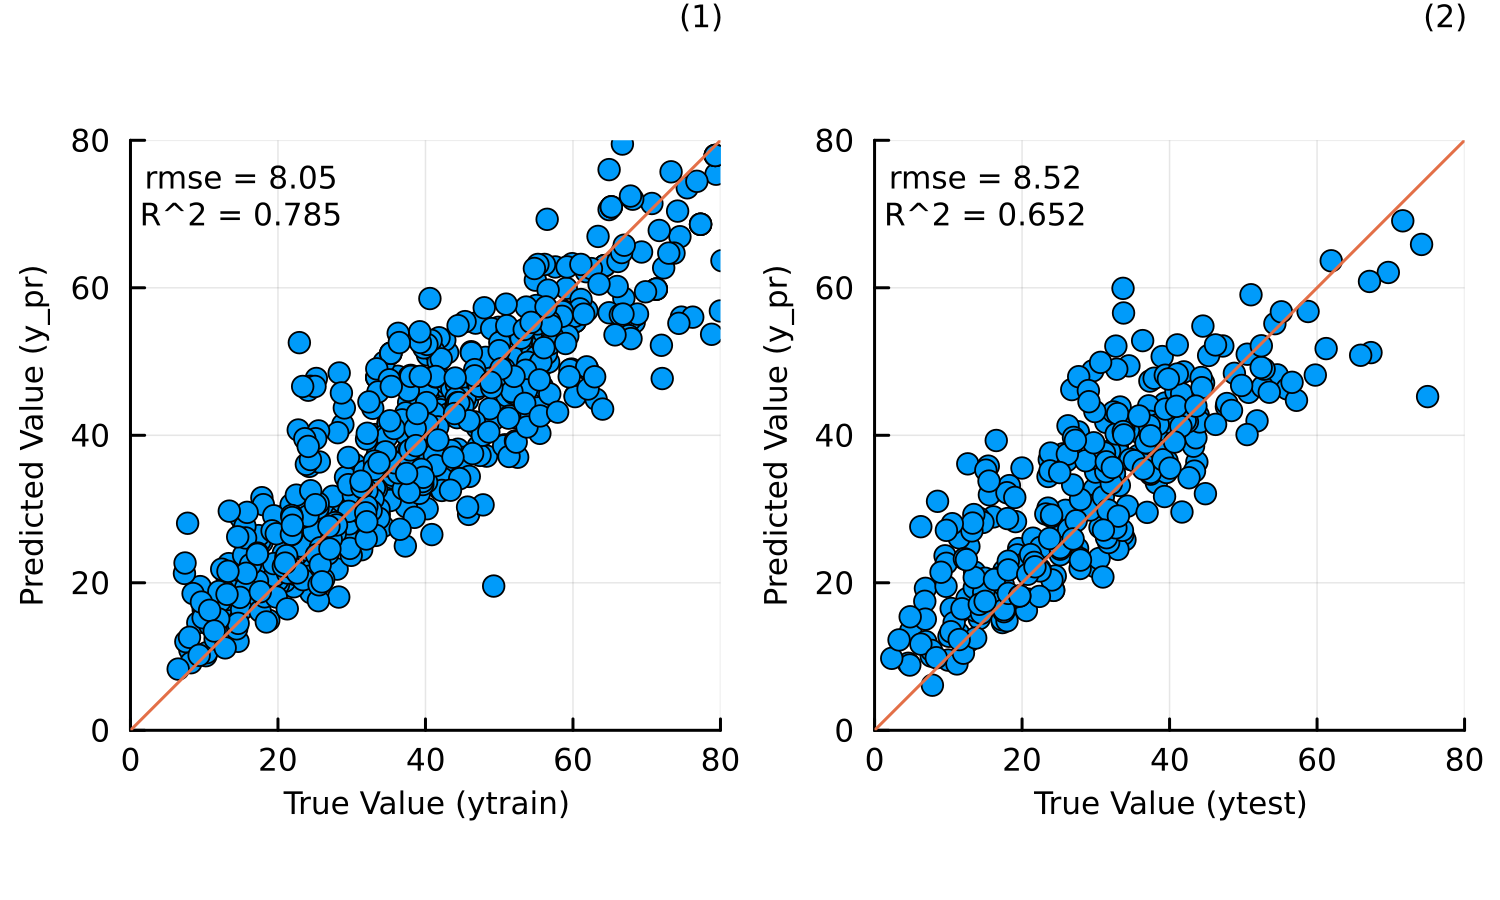

In [221]:
display(plottraintest(ytrain, y_pr_trainnorm, ytest, y_pr_testnorm))#,"Normalised x_train & Hyperparameter Tuned (Train)", "Normalised x_train & Hyperparameter Tuned (Test)"))
savefig(joinpath(dirname(@__FILE__), "SVR_normed_2.png"))

In [223]:
function plotval_norm(yval, y_pr_val, y_pr_valnorm)

    fsize = 7
    ftsize = 7
    xx = 0:80
    compare_plt_train = plot(ytrain, y_pr_train, 
    st=:scatter,
    xlims=(0,80),
    ylims=(0,80),
    xlab = "True Value (yval)",
    ylab = "Predicted Value (y_pr)",
    size = (500,500),
    aspect_ratio=:equal, legend=false)
    plot!(xx, xx, st=:line)
    rmse_train = sqrt(mse(y_pr_val, yval))
    r2_train = r2_score(y_pr_val, yval)
    annotate!(15,75, text("rmse = $(round(rmse_train, sigdigits=3))", fsize))
    annotate!(15,70, text("R^2 = $(round(r2_train, sigdigits=3))", fsize))

    compare_plt_test = plot(ytest, y_pr_test, 
    st=:scatter,
    xlims=(0,80),
    ylims=(0,80),
    xlab = "True Value (yval)",
    ylab = "Predicted Value (y_pr)",
    size = (500,500),
    aspect_ratio=:equal, legend=false)
    plot!(xx, xx, st=:line)
    rmse_test = sqrt(mse(y_pr_valnorm, yval))
    r2_test = r2_score(y_pr_valnorm, yval)
    annotate!(15,75, text("rmse = $(round(rmse_test, sigdigits=3))", fsize))
    annotate!(15,70, text("R^2 = $(round(r2_test, sigdigits=2))", fsize))

    title1 = ["Optimized SVR Model (w/o Normalization) (1)" "Optimized SVR Model (w Normalization) (2)"]
    plt2 = plot(compare_plt_train, compare_plt_test, dpi=300, size=(500, 300), left_margin = [1mm 0mm], bottom_margin = [0mm 0mm], guidefontsize = fsize, xtickfont = font(ftsize), ytickfont = font(ftsize), title=title1,  titleloc = :center, titlefont = font(fsize))

    return plt2
end

plotval_norm (generic function with 2 methods)

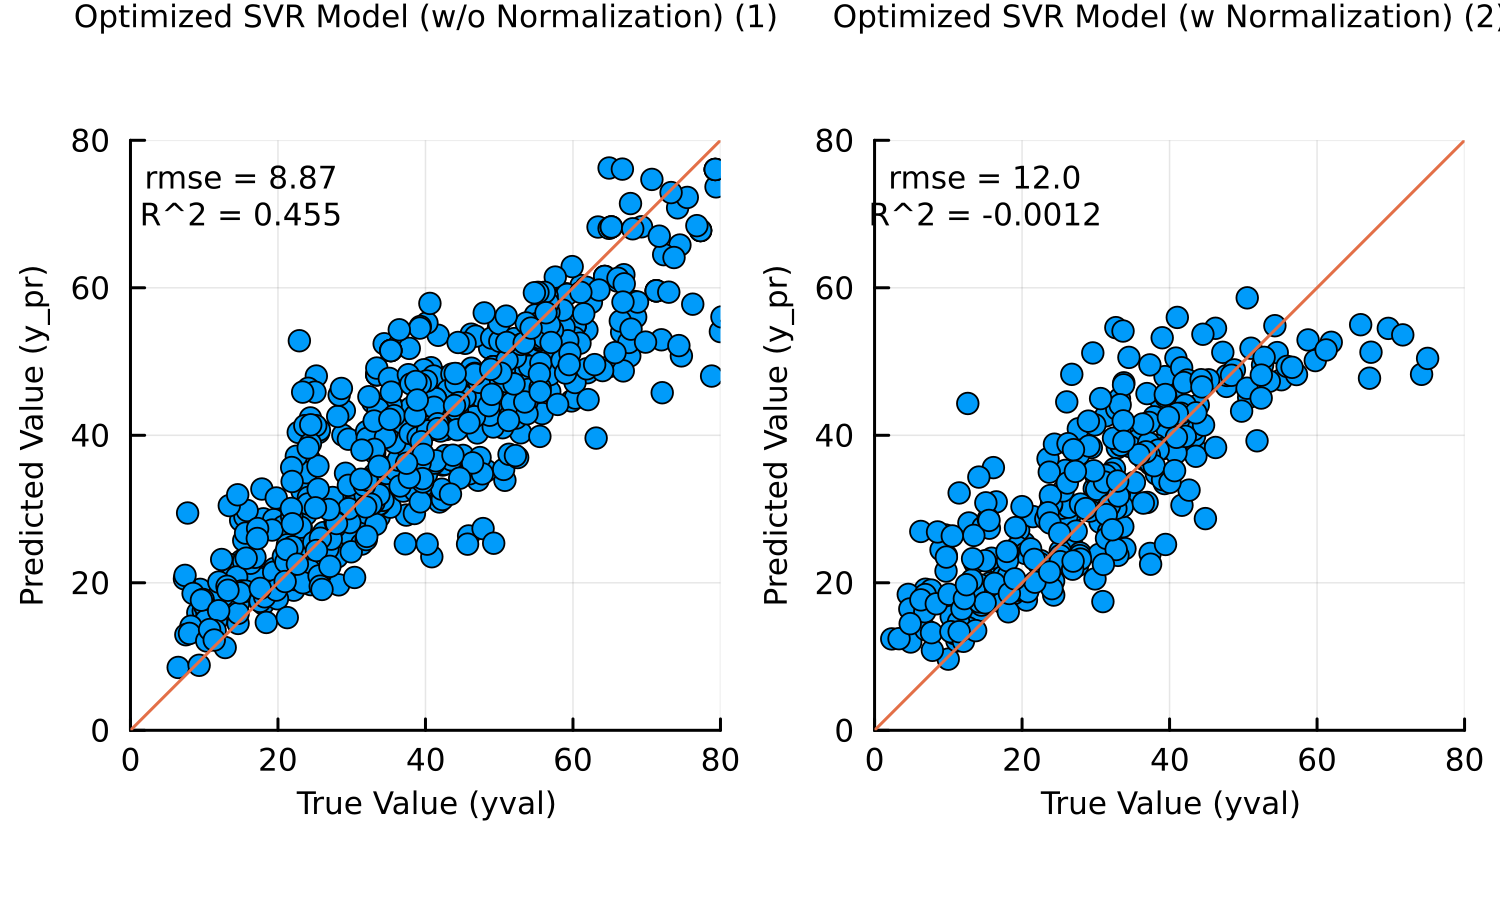

In [224]:
display(plotval_norm(yval, y_pr_val, y_pr_valnorm))
savefig(joinpath(dirname(@__FILE__), "SVR_val_2.png"))

In [15]:
# #plotting graph to see predicted vs true
# compare_plt = plot(ytest, y_pr, 
# st=:scatter,
# xlims=(0,80),
# ylims=(0,80),
# xlab = "True Value (ytest)",
# ylab = "Predicted Value (y_pr)",
# size = (500,500))

# xx = 0:80
# yy = 0:80

# plot!(compare_plt, xx, yy, st=:line)

# annotate!(15,75, text("rmse = $(round(rmse_SVR, sigdigits=2))", 10))

# display(compare_plt)

In [16]:
# #plotting graph to see predicted vs true
# compare_plt = plot(ytrain, y_pr, 
# st=:scatter,
# xlims=(0,80),
# ylims=(0,80),
# xlab = "True Value (ytrain)",
# ylab = "Predicted Value (y_pr)",
# size = (500,500))

# xx = 0:80
# yy = 0:80

# plot!(compare_plt, xx, yy, st=:line)

# mse_SVR = mse(y_pr, ytrain)
# annotate!(15,75, text("mse = $(round(mse_SVR, sigdigits=2))", 10))

# display(compare_plt)